In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import polars as pl
import pprint

1. Дана м.в.п. однородной цепи Маркова

In [4]:
P1=[[0.25,0.75,0,0],
			  [0.5,0,0.5,0],	
			  [0,0.5,0,0.5],
			  [0,0,0.75,0.25]]

P2=[[2/9,1/3,0,4/9],
			  [4/9,1/9,0,4/9],
			  [2/9,2/9,2/9,1/3],
			  [2/9,2/9,4/9,1/9]]

P3=[[0,0.5,0,0.5],
			  [1/3,0,2/3,0],
			  [0,0.25,0,0.75],
			  [0.25,0,0.75,0]]
'''
эта матричка последняя мб переписана в виде 
0 0 0.5 0.5
0 0 0.25 0.75
0.33 0.67 0 0
0.25 0.75 0 0
для этого надо свопнуть второе и третье состояние местами
'''
None

Найти стационарное распределение.

In [5]:
def transformation(A):
	A=A.T
	n=int(A.size**0.5)
	for i in range(n):
		for j in range(n):
			if i==j:
				A[i,j]-=1
	C=A[0:n,1:n]
	b=-A[0:n,0]
	b=b.T
	b=np.array(b)
	return C,b,n

def grid_search(A,b,n):
	for i in range(n):
		C=np.matrix(np.delete(A,i,0))
		d=np.array(np.delete(b,i))
		try:
			X=np.linalg.solve(C,d)
			break
		except np.linalg.LinAlgError:
			continue
	X=np.concatenate((np.array([1]),X))
	return X/X.sum()

In [6]:
for i in [1,5,10,20,30,50]:
	A=np.matrix(P1)
	A=np.linalg.matrix_power(A,i)
	A,b,n=transformation(A)
	print(grid_search(A,b,n))
	
print('\n')

for i in [1,5,10,20,30,50]:
	A = np.matrix(P2)
	A=np.linalg.matrix_power(A,i)
	A, b, n = transformation(A)
	print(grid_search(A, b, n))

print('\n')
'''
for i in [1,5,10,20,30,50]:#задание-"троллинг", как высказался бы Андрей Леонидович Канунников - цепь-то периодическая
	A = np.matrix(P3)
	A=np.linalg.matrix_power(A,i)
	A, b, n = transformation(A)
	print(grid_search(A, b, n))
'''
None

[0.2 0.3 0.3 0.2]
[0.2 0.3 0.3 0.2]
[0.2 0.3 0.3 0.2]
[0.2 0.3 0.3 0.2]
[0.2 0.3 0.3 0.2]
[0.2 0.3 0.3 0.2]


[0.27272727 0.22727273 0.18181818 0.31818182]
[0.27272727 0.22727273 0.18181818 0.31818182]
[0.27272727 0.22727273 0.18181818 0.31818182]
[0.27272727 0.22727273 0.18181818 0.31818182]
[0.27272727 0.22727273 0.18181818 0.31818182]
[0.27272727 0.22727273 0.18181818 0.31818182]


[0.13829787 0.15957447 0.36170213 0.34042553]
[0.13829787 0.15957447 0.36170213 0.34042553]
[0.27659574 0.         0.72340426 0.        ]
[0.27659574 0.         0.72340426 0.        ]
[0.27659574 0.         0.72340426 0.        ]
[0.27659574 0.         0.72340426 0.        ]


2. Пусть ξn – ЦМ c м.в.п. Найти стационарное распределение. Построить траекторию цепи. Сходится ли она п.н.? Найти долю посещений каждого из состояний за большое число n шагов. Сходится ли она п.н.? Моделируем 100 траекторий и для каждой вычтем из доли посещения первого состояния соответствующую стационарную вероянтость, умножим результат на √n. Построить гистограмму полученного распределения.

In [5]:
P=np.matrix([[1/3,1/3,1/3],
			 [3/4,0,1/4],
			 [1/2,1/6,1/3]])

In [6]:
A = np.matrix(P)
A, b, n = transformation(A)
pi=grid_search(A, b, n)
print(pi)

[0.47368421 0.21052632 0.31578947]


[0.466 0.477 0.489 0.457 0.483 0.477 0.461 0.479 0.48  0.47  0.462 0.471
 0.477 0.496 0.473 0.469 0.48  0.479 0.463 0.464 0.464 0.486 0.485 0.468
 0.483 0.468 0.473 0.472 0.457 0.47  0.477 0.463 0.478 0.473 0.478 0.452
 0.472 0.51  0.458 0.474 0.444 0.48  0.449 0.458 0.469 0.474 0.472 0.508
 0.469 0.463 0.455 0.474 0.459 0.472 0.474 0.481 0.481 0.455 0.478 0.488
 0.483 0.478 0.478 0.484 0.463 0.5   0.484 0.477 0.485 0.477 0.489 0.478
 0.462 0.469 0.468 0.469 0.484 0.483 0.47  0.509 0.455 0.472 0.463 0.472
 0.468 0.468 0.489 0.463 0.513 0.468 0.491 0.485 0.47  0.473 0.491 0.474
 0.437 0.476 0.456 0.449]


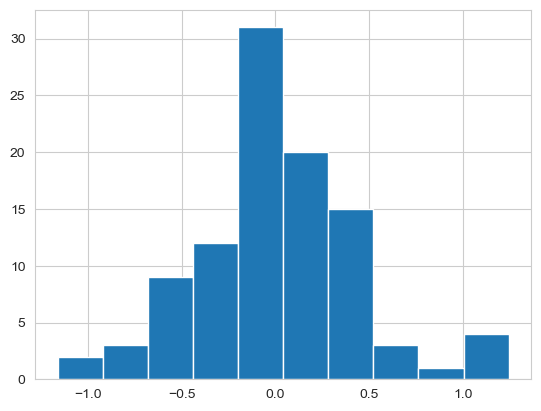

In [7]:
n=1000
p=pi #можно чето другое будет вбить
results=np.zeros(100)
for i in range(100):
	X=np.zeros(n)
	c=np.random.multinomial(1,p)
	for k in range(3):
		if c[k]==1:
			X[0]=k
	for j in range(1,n):
		c=np.random.multinomial(1,P[int(X[j-1]),].tolist()[0])
		for k in range(3):
			if c[k]==1:
				X[j]=k
	for j in range(n):
		if X[j]==0:
			results[i]+=1
results/=n
print(results)
results-=pi[0]
results*=n**0.5
plt.hist(results)
None

3. В файле MarkovChain.txt находится м.в.п. цепи, не имеющей несущественных состояний. Написать программу, которая а) разделит состояния на неразложимые классы, б)* каждый из классов на подклассы состояний в соответствии с периодичностью цепи.

In [3]:
data=pl.read_csv('/Users/mihailkondrasin/Desktop/Матпрак/сем 2/CSVS/MarkovChain.txt',separator=';')
size=50
data

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
i64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64
0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
0,0.0,0.0,0,0,0.166667,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0,0.0
0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.0,0.111111,0.0,0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0,0.0,0.0,0.0,0.111111,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.111111,0,0.111111
0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,0.0,0.0,0,0,0.0,0.25,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.166667,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
0,0.2,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.2,0.0,0.2,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [36]:
#неразложимые классы
n=0
classes=[]
P=np.matrix(data)
while n!=size:
	clas=[]
	changes=1
	for i in range(50):
		find=0
		for j in range(len(classes)):
			for k in (classes[j]):
				if i==k:
					find=1
					break
		if find==0:
			clas.append(i)
			break
	while changes==1:
		changes=0
		for i in clas:
			for j in range(50):
				if P[i,j]!=0:
					isfound=0
					for k in clas:
						if k==j:
							isfound=1
					if isfound==0:
						clas.append(j)
						changes=1
	n+=len(clas)
	classes.append(clas)
size=[]
for i in range(len(classes)):
	classes[i]=np.sort(classes[i])
	size.append(len(classes[i]))
	print(len(classes[i]))
print([i.tolist() for i in classes])

2
29
3
6
8
2
[[0, 37], [1, 2, 5, 7, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 42, 43, 44, 47, 49], [3, 17, 48], [4, 16, 18, 22, 41, 46], [6, 8, 23, 24, 36, 38, 40, 45], [31, 39]]


In [53]:
#функция делает матрицу, соответствующую неразложимому классу. Единицами отмечены элементы, достижимые за один шаг
def otrezayem(P,coeffs):
	otrezali=np.matrix([[0]*len(coeffs)]*len(coeffs))
	for i in range(len(coeffs)):
		for j in range(len(coeffs)):
			if P[coeffs[i],coeffs[j]]!=0:
				otrezali[i,j]=1
	return otrezali

In [54]:
def dostijimije(P,size,i):
	results=[]
	for j in range(size):
		if P[i,j]!=0:
			results.append(j)
	return results

In [82]:
def isinlist(lst,el):
	for i in lst:
		if el==i:
			return 1
	return 0

In [78]:
def unity(lst):
	result=[]
	for i in lst:
		for j in i:
			if isinlist(result,j)==0:
				result.append(j)
	return result

In [79]:
def hasinter(lst1,lst2):
	for i in lst1:
		for j in lst2:
			if i==j:
				return 1
	return 0

In [89]:
#работаем с матрицами неразложимых классов
def periods(P,size):
	classes=[[0]]
	n=1
	k=0
	while n!=size:
		dost=[]
		for i in classes[k]:
			dost=unity([dost,dostijimije(P,size,i)])
		m=(k+1)%len(classes)
		if hasinter(classes[m],dost)==1:
			z=len(classes[(k+1)%len(classes)])
			classes[0]=unity([classes[m],dost])
			n+=len(classes[m])-z
			k=(k+1)%len(classes)
		else:
			classes.append(dost)
			n+=len(dost)
			k=(k+1)%len(classes)
	return classes

In [90]:
for i in range(len(classes)):
	coeffs=classes[i]
	print(coeffs)
	P=np.matrix(data)
	p=otrezayem(P,coeffs)
	if size[i]<9:
		print(p)
	sets=periods(p,size[i])
	returning=[]
	for i in sets:
		returning.append([])
		for j in i:
			returning[len(returning)-1].append(coeffs[j])
	print(returning)

[ 0 37]
[[0 1]
 [1 0]]
[[0], [37]]
[ 1  2  5  7  9 10 11 12 13 14 15 19 20 21 25 26 27 28 29 30 32 33 34 35
 42 43 44 47 49]
[[1, 14, 26, 28, 30], [5, 9, 11, 20, 25, 43], [2, 7, 13, 19, 27, 32, 33, 34, 42], [10, 12, 15, 21, 29, 35, 44, 47, 49]]
[ 3 17 48]
[[0 1 0]
 [0 0 1]
 [1 0 0]]
[[3], [17], [48]]
[ 4 16 18 22 41 46]
[[0 1 0 0 0 1]
 [0 0 1 1 1 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 1 1 0]]
[[4], [16, 46], [18, 22, 41]]
[ 6  8 23 24 36 38 40 45]
[[0 0 0 1 1 0 1 1]
 [0 0 0 1 1 0 1 1]
 [0 0 0 1 1 0 1 1]
 [1 1 1 0 0 1 0 0]
 [1 1 1 0 0 1 0 0]
 [0 0 0 1 1 0 1 1]
 [1 1 1 0 0 1 0 0]
 [1 1 1 0 0 1 0 0]]
[[6, 8, 23, 38], [24, 36, 40, 45]]
[31 39]
[[0 1]
 [1 0]]
[[31], [39]]


4.Пусть ξn – ЦМ с м.в.п. P. Какую м.в.п. имеет обращенная цепь ξN−n? Исследовать к какому распределению сходится а) прямая
цепь б) обращенная цепь?

In [6]:
P=[[0,0,0.5,0.5],
   [0,0,0,1],
   [0.5,0,0,0.5],
   [1/3,1/3,1/3,0]]

In [8]:
A=np.matrix(P)
A,b,n=transformation(A)
c=grid_search(A,b,n)
Inv=[]
A=np.matrix(P)
for i in range(4):
	Inv.append([])
	for j in range(4):
		Inv[i].append(A[j,i]*c[j]/c[i])
print(A)
print(c)
B=np.matrix(Inv)
print(B)
#матрицы совпадают...


[[0.         0.         0.5        0.5       ]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]]
[0.25  0.125 0.25  0.375]
[[0.         0.         0.5        0.5       ]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]]


5.Моделировать случайное блуждание а) на целочисленной решетке прямой, выбирающее равновероятно
одну из двух соседних точек б) на целочисленной решетке плоскости, выбирающее равновероятно одну
из четырех соседних точек в) в трехмерном пространстве, выбирающее равновероятно одну из шести
соседних точек. Какие из них, исходя из моделирования, оказались возвратными?

In [25]:
results=[0,0,0]
moments=[[],[],[]]
for mode in range(1,4):
	for attempts in range(100):
		cur=[0]*mode
		for i in range(1000):
			add=np.random.randint(mode*2)
			if add%2==0:
				cur[add//2]-=1
			else:
				cur[add//2]+=1
			if cur==[0]*mode:
				results[mode-1]+=1
				moments[mode-1].append(i)
				break
	print(results[mode-1])	

98
72
35


In [28]:
results=[0,0,0]
moments=[[],[],[]]
for mode in range(1,4):
	for attempts in range(100):
		cur=[0]*mode
		for i in range(100000):
			add=np.random.randint(mode*2)
			if add%2==0:
				cur[add//2]-=1
			else:
				cur[add//2]+=1
			if cur==[0]*mode:
				results[mode-1]+=1
				moments[mode-1].append(i)
				break
	print(results[mode-1])	

100
77
43


In [24]:
results=[0,0,0]
moments=[[],[],[]]
for mode in range(1,4):
	for attempts in range(100):
		cur=[0]*mode
		for i in range(100000000):
			add=np.random.randint(mode*2)
			if add%2==0:
				cur[add//2]-=1
			else:
				cur[add//2]+=1
			if cur==[0]*mode:
				results[mode-1]+=1
				moments[mode-1].append(i)
				break
	print(results[mode-1])	

100
89
39
